# Responsibile AI Workshop


# Baseline

## Train XGBoost model on Adult


Task: You are working for the bank BAB (Big American Bank). The CEO og BAB has decided that the bank should start using more AI in their applications. You have held a few workshops to figure out what tasks you can try to solve with AI. 

One problem that BAB has, is customers that have lower income that they report they will get, when applying for loans. This leads to problems where the customers are not able to pay down their loan. Therefor, the CEO of BAB wants you to make an AI model which predicts wether a customer will have a income higher than 50 K. 

### Load data

In [163]:
import pandas as pd, joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import shap
import numpy as np
import matplotlib.pyplot as plt

!python ../scripts/fetch_adult.py

# 1. Load data
df = pd.read_csv('../data/adult.csv')

# 2. Feature engineering
X = pd.get_dummies(df.drop('income', axis=1),
    dtype=int)
y = (df['income'] == '>50K').astype(int)

Dataset already downloaded


### Get an understanding of the data

In [164]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [165]:
X.head(15)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train an XGBoost model

In [166]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Instantiate XGBoost classifier
bst = XGBClassifier(
    n_estimators=100,
    n_jobs=-1,
    use_label_encoder=False,   # suppresses a deprecation warning
    eval_metric='logloss',     # needed when use_label_encoder=False
    verbosity=0                # silent training
)

# 5. Fit
bst.fit(X_train, y_train)

# 6. Predict
pred = bst.predict(X_test)

# 7. Evaluate
print('Accuracy:', accuracy_score(y_test, pred))
print('F1:', f1_score(y_test, pred))
print('ROC AUC:', roc_auc_score(y_test, pred))

`use_label_encoder` is deprecated in 1.7.0.


Accuracy: 0.8770152003684938
F1: 0.7259664728019158
ROC AUC: 0.8082414828046073


# Module: Explainability

After you have created the model, you have to report to the CTO of BAB how the model is working.

### Explain how the model is working with global SHAP plots (global explanation).

### First: Plot feature importance

 98%|===================| 6371/6513 [00:38<00:00]        

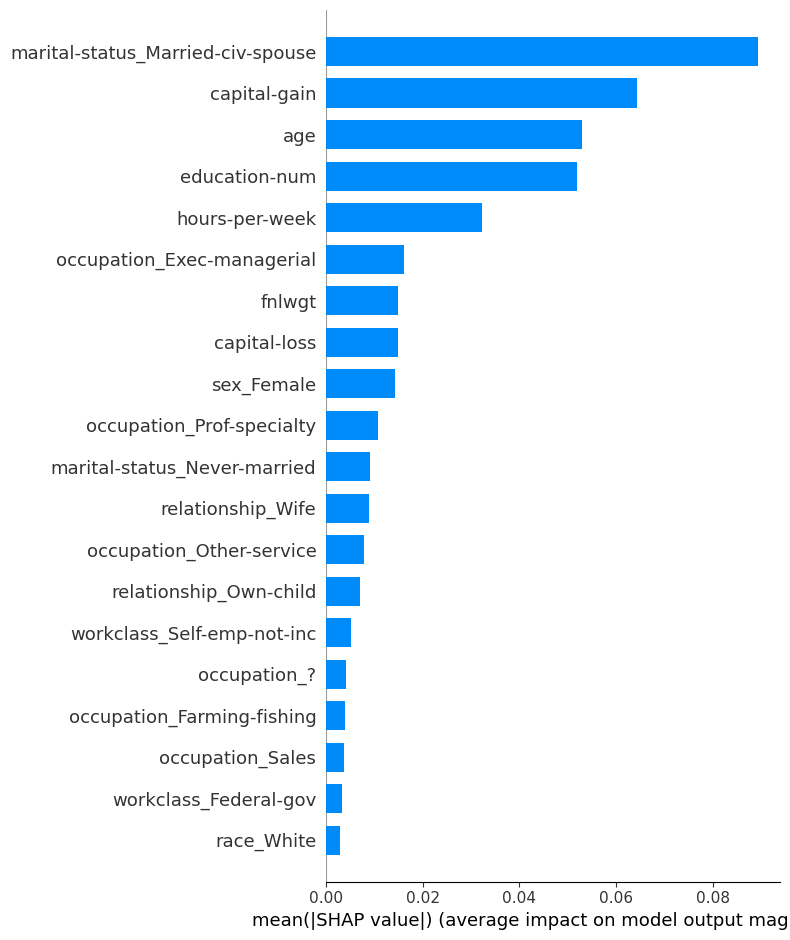

<Figure size 640x480 with 0 Axes>

In [167]:
# 3. Create a SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(bst,
                               data=X_train.sample(100),
                              model_output="probability")
# For XGBoost, shap_values will be a matrix: rows=samples, cols=features
shap_values = explainer.shap_values(X_test)

# 4. Plot global feature importance (summary plot)
shap.initjs()  # Optional: for interactive JS plots in notebooks
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.tight_layout()
plt.show()

#### Task: Based on the figure, write down an explanation to the CTO of how the model is working.

"Write email to the CTO with explanation here"

#### Second: Plot the global shap values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


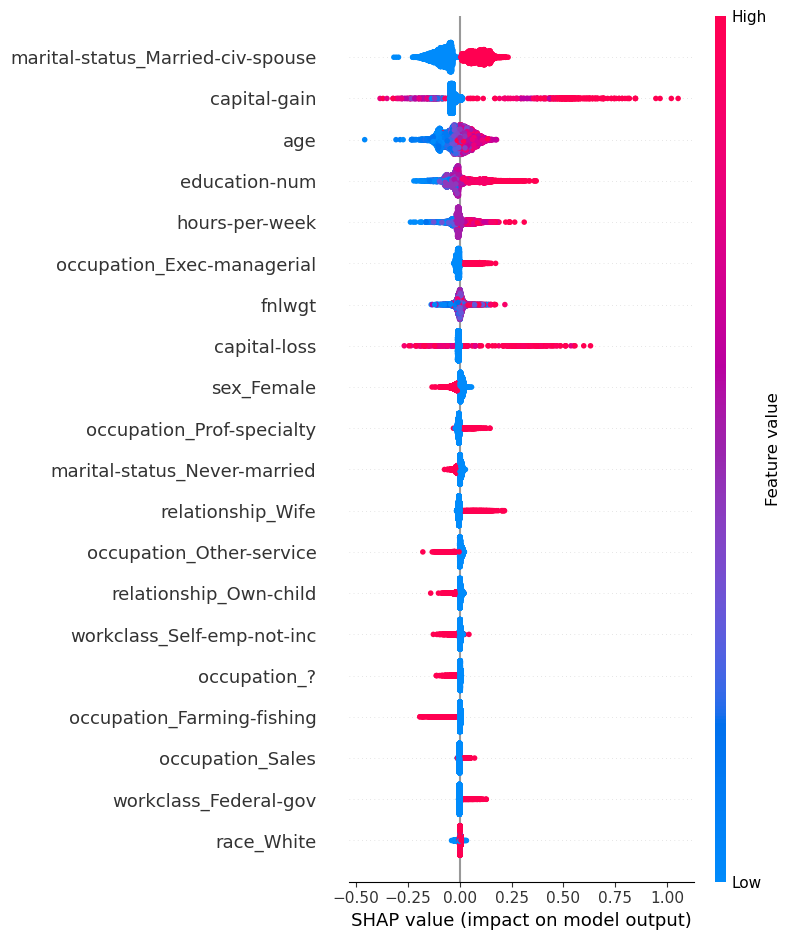

<Figure size 640x480 with 0 Axes>

In [168]:
# 5. (Optional) Detailed summary dot-plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)
plt.tight_layout()
plt.show()

#### TASK: Based on the figure, write to the CTO how the model is working.

"Write email to the CTO with explanation here"

### Local shap for one person

Your model is now put into production, where a customer will only their loan application confirmed if they are predicted to have an income aboce 50 K. However, to correspons with GDPR and the EU AI ACT, you aere obliged to inform the customers of the reasons behind your decisions if they ask.

Two people have come and asked for an explanation about the decision regarding their loan application. Experiment with different idx, find a person that got the prediction to not get the loan (class 0), and one who got the prediction to get the loan (class 1). Based on the plots below, write dowm the explanation for both of them. 

In [169]:
# pick the customer_index of the customer you care about
idx = 1  

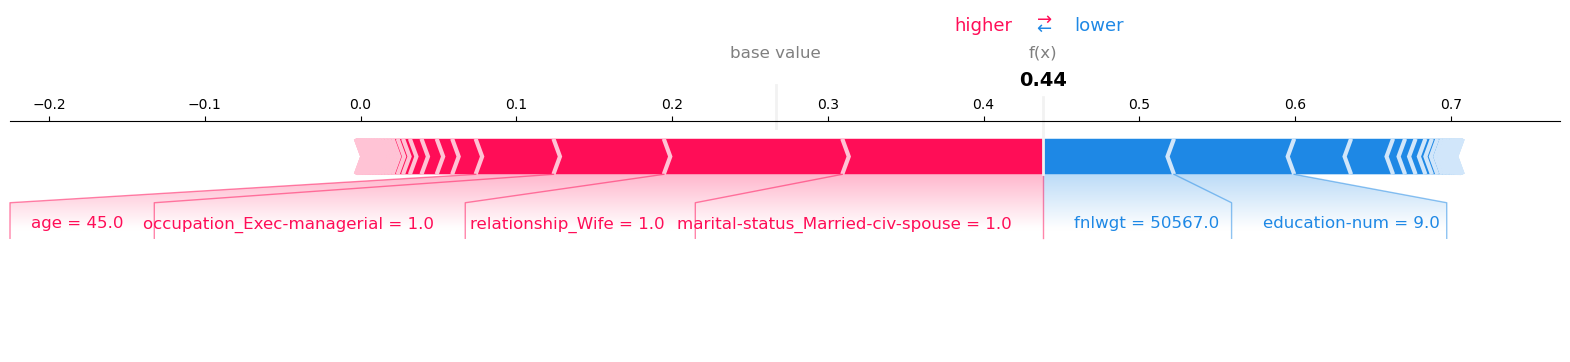

In [170]:
shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True
)

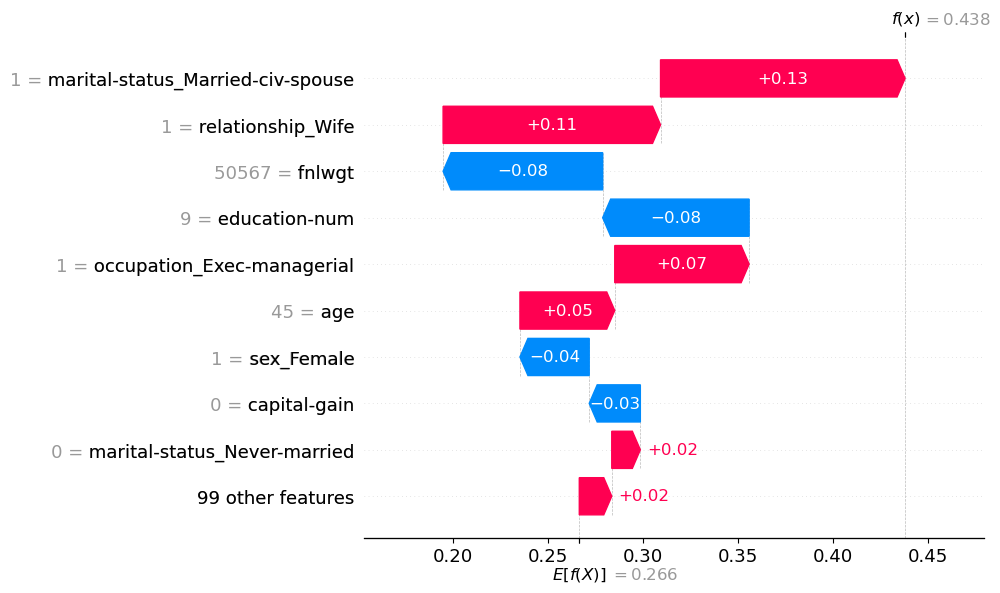

In [171]:
# for shap >= 0.39
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[idx],
        base_values=explainer.expected_value,
        data=X_test.iloc[idx]
    )
)

Write down the explanations for the two customers below.

"Write down explanation to customer 1 here (customer with approval)"

"Write down explanation to customer 2 here (customer with rejection)"

# Uncertainty

You have been asigned a new project, and now you are training a classification algorithm BAC (Big American Cars), a company creating autonomous cars. You are going to train an algorithm to regonize type of the object in front of the car. To do this, you are using the CIFAR10 dataset. You can read about it here: https://www.cs.toronto.edu/~kriz/cifar.html. Since autonomous cars is definitly high-risk, you will not only create a model which predicts the object class, but also estimates the uncertainty, both the aleatoric and the epistemic.

Lets do necessary imports and neural network settings

In [172]:
# Lightweight CNN (to keep training ≤1 min on CPU, seconds on GPU)
import torch.nn as nn, torch.nn.functional as F, torch, torchvision, torch.nn as nn, torch.optim as optim, numpy as np
print("Torch version:", torch.__version__, "CUDA available:", torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu'
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

Torch version: 2.7.0+cpu CUDA available: False


Import the CIFAR10 dataset

In [173]:
# CIFAR‑10 subset
cifar = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=transform)
subset_idx = torch.randperm(len(cifar))[:1000]
cifar_subset = torch.utils.data.Subset(cifar, subset_idx)

Define the neural network architecture. You are using a TinyCNN to reduce training time, making it work only on CPU. Note that the model is returning two nodes, not only one. One node gives the mean prediction (mean), while the other predicts the logarithm of the aleatoric variance (logvar). You can read the reason behind this further below.

In [183]:
# ----------------------------------------
# 1) Model definition with two heads
# ----------------------------------------
class TinyCNN(nn.Module):
    def __init__(self, num_classes=10, p_drop=0.5):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.dropout = nn.Dropout(p_drop)
        self.fc1   = nn.Linear(32*8*8, 64)
        self.head_mean   = nn.Linear(64, num_classes)
        self.head_logvar = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1)
        x = F.relu(self.dropout(self.fc1(x)))
        mean   = self.head_mean(x)
        logvar = self.head_logvar(x)
        return mean, logvar

## Aleatoric Uncertainty
Now you are going to perform a heteroscedasic training loop, which means a training process where the model learns to handle varying levels of uncertainty or noise in the data. The term heteroscedasticity typically refers to the condition where the variance of the errors (or noise) is not constant across all observations, i.e., the variance changes depending on the input or across the data distribution.

In the context of neural networks, a heteroscedastic training loop often involves modeling the variance of the target variable, in addition to predicting the mean. The goal is for the neural network to learn both the mean and the variance of the target values. This approach is especially useful when dealing with data that has non-constant variance — for example, when the uncertainty of predictions is higher for certain regions of the input space.

Here's how it works in practice:

Model Output: The network typically outputs two components for each input:

1. The mean (predicted value).
2. The logarithm of the variance (which captures the natural uncertainty / heteroscedasticity / randomness in the data, i.e. the aleatoric uncertainty).

Loss Function: The loss function is designed to account for both the prediction and the uncertainty. A common choice is the negative log-likelihood (NLL) for a Gaussian distribution: 

$$\text{NLL} = \frac{1}{2} \left( \log(\sigma^2) + \frac{(y - \mu)^2}{\sigma^2} \right)$$

Training: During training, the network learns to adjust both the predicted mean and the variance, making the model aware of where the uncertainty is high (e.g., regions where the model is less confident) and where it's low.

In [184]:

# ----------------------------------------
# 2) Heteroscedastic training loop
# ----------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TinyCNN(num_classes=10).to(device)
optimizer  = optim.Adam(model.parameters(), lr=1e-3)
loader = torch.utils.data.DataLoader(cifar_subset, batch_size=64, shuffle=True)

for epoch in range(20):
    model.train()
    total_loss = 0.0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        y_mean, y_logvar = model(imgs)

        # heteroscedastic Gaussian NLL:
        # precision = exp(−logvar)
        precision = torch.exp(-y_logvar)
        # per-sample per-class loss, then sum over classes
        # here we treat labels as class-indices, so we pick the mean/logvar for the true class
        mean_pick   = y_mean.gather(1, labels.unsqueeze(1)).squeeze(1)
        logvar_pick = y_logvar.gather(1, labels.unsqueeze(1)).squeeze(1)
        precision_pick = torch.exp(-logvar_pick)

        # negative log likelihood:
        loss = torch.mean( 0.5 * precision_pick * (0 - mean_pick)**2
                         + 0.5 * logvar_pick
                         - torch.log(torch.sqrt(precision_pick)) )
        # For multi-classification you might want a different likelihood (e.g. softmax‐Gaussian mix),
        # but this illustrates the heteroscedastic principle. You can try another one if you have time!

        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)

    avg_loss = total_loss / len(loader.dataset)
    print(f"Epoch {epoch+1:2d} — Avg Loss: {avg_loss:.4f}")

Epoch  1 — Avg Loss: -0.1620
Epoch  2 — Avg Loss: -0.5748
Epoch  3 — Avg Loss: -0.9123
Epoch  4 — Avg Loss: -1.2045
Epoch  5 — Avg Loss: -1.4908
Epoch  6 — Avg Loss: -1.8458
Epoch  7 — Avg Loss: -2.0418
Epoch  8 — Avg Loss: -2.3670
Epoch  9 — Avg Loss: -2.7264
Epoch 10 — Avg Loss: -2.3274
Epoch 11 — Avg Loss: -2.6209
Epoch 12 — Avg Loss: -3.2822
Epoch 13 — Avg Loss: -3.5387
Epoch 14 — Avg Loss: -3.4821
Epoch 15 — Avg Loss: -3.0373
Epoch 16 — Avg Loss: -3.3181
Epoch 17 — Avg Loss: -3.5859
Epoch 18 — Avg Loss: -3.7282
Epoch 19 — Avg Loss: -3.4241
Epoch 20 — Avg Loss: -3.8017


### Benefits of Heteroscedastic Training:

Uncertainty Estimation: It helps in quantifying uncertainty in predictions, which is useful for applications like risk assessment, decision-making, and active learning.

Improved Robustness: The model can perform better in regions with high variance, as it adjusts the weights based on the confidence level.

Better Handling of Noisy Data: The model can adapt to datasets with non-homogeneous noise distributions, unlike traditional methods that assume constant variance.

## Epistemic Uncertaity
To estimate the epistemic uncertainty, we are going to perform a MC-dropout at test time. Dropout is a regularization technique used during the training of neural networks. It involves randomly "dropping out" (i.e., setting to zero) a proportion of the neurons in a network during each training step, forcing the network to learn more robust features by preventing overfitting.

However, dropout is typically used only during training. In the original design, dropout is turned off during test time, and the full network is used to make predictions.

Training with Dropout: During the training phase, the neural network is trained with dropout, meaning that random neurons are dropped out on each forward pass.

Test-Time Dropout: Instead of turning off dropout during testing (as is typically done), you keep dropout active during inference (the test phase). This means that on each forward pass at test time, different neurons are randomly dropped out.

Multiple Forward Passes: To estimate the epistemic uncertainty, you perform multiple forward passes (e.g., 30, 100, or more) with dropout enabled. Each forward pass will produce a slightly different result because different neurons are being dropped out each time.

Epistemic Uncertainty: The epistemic uncertainty reflects the model's uncertainty about the correct model parameters. It quantifies the uncertainty due to lack of knowledge or model ambiguity (as opposed to aleatoric uncertainty, which is due to noise in the data). By averaging over many stochastic forward passes (with dropout), you can get a distribution of predictions, which gives you an estimate of how much the model is "uncertain" about its predictions.

In [186]:

# ----------------------------------------
# 3) MC-Dropout inference with uncertainties
# ----------------------------------------
def mc_dropout_uncertainty(model, x, T=50):
    """
    model: should be in train() mode (dropout on)
    x    : input batch [B, 3, 32, 32]
    T    : number of MC samples

    Returns numpy arrays:
      pred_mean     [B, C]  : mean logits over T passes
      epistemic_unc [B, C]  : variance of logits over T passes
      aleatoric_unc [B, C]  : mean predicted variance over T passes
    """
    model.train()  # ensure dropout active
    preds = []
    vars_ = []

    with torch.no_grad():
        for _ in range(T):
            y_mean, y_logvar = model(x)
            preds.append(y_mean.cpu().numpy()[None, ...])
            vars_.append((torch.exp(y_logvar).cpu().numpy())[None, ...])

    preds = np.concatenate(preds, axis=0)  # shape [T, B, C]
    vars_ = np.concatenate(vars_,  axis=0)  # shape [T, B, C]

    pred_mean     = preds.mean(axis=0)    # [B, C]
    epistemic_unc = preds.var(axis=0)     # [B, C]
    aleatoric_unc = vars_.mean(axis=0)    # [B, C]

    return pred_mean, epistemic_unc, aleatoric_unc


Run the drop-oup process, and get the average uncertainty across the data set. Note that the uncertainty is given in logit, not probabillity. 

In [187]:
# Example usage on one batch:
model.train()  # dropout on
imgs, labels = next(iter(loader))
imgs = imgs.to(device)

pred_mean, epi_unc, ale_unc = mc_dropout_uncertainty(model, imgs, T=50)

print("Prediction shape:    ", pred_mean.shape)
print("Epistemic shape:     ", epi_unc.shape)
print("Aleatoric shape:     ", ale_unc.shape)
print("Avg epistemic unc:   ", epi_unc.mean())
print("Avg aleatoric unc:   ", ale_unc.mean())


Prediction shape:     (64, 10)
Epistemic shape:      (64, 10)
Aleatoric shape:      (64, 10)
Avg epistemic unc:    0.000957419
Avg aleatoric unc:    0.041405607


Since the logit uncertainty does not make sense to most people, we tranform it to the probability space with the functions below.

In [ ]:
def softmax(x):
    """Simple 1-d softmax."""
    e = np.exp(x - np.max(x))
    return e / e.sum()

def logit_var_to_prob_std(pred_mean_logits, epi_unc_logits, ale_unc_logits):
    """
    pred_mean_logits:  shape (C,)  — mean logit for each class
    epi_unc_logits:    shape (C,)  — variance of logits (epistemic)
    ale_unc_logits:    shape (C,)  — variance of logits (aleatoric)

    Returns:
      sigma_epi_prob:  (C,)  std-change in probability from weight-uncertainty
      sigma_ale_prob:  (C,)  std-change in probability from data-noise
    """
    # 1) get mean probabilities
    p = softmax(pred_mean_logits)

    # 2) logit‐std
    sigma_epi_logit = np.sqrt(epi_unc_logits)
    sigma_ale_logit = np.sqrt(ale_unc_logits)

    # 3) delta‐method: dp/dℓ ≈ p*(1−p)
    dp_dlogit = p * (1 - p)

    # 4) std in prob‐space
    sigma_epi_prob = dp_dlogit * sigma_epi_logit
    sigma_ale_prob = dp_dlogit * sigma_ale_logit

    return sigma_epi_prob, sigma_ale_prob

To get the uncertainty related to one image, choose a image by the index i below.

In [189]:
i = 0   # or any index from 0 to B-1

# per‐class probabilities and uncertainties for image i
probs_image      = pred_mean[i]    # shape (C,)
epi_unc_image    = epi_unc[i]      # shape (C,)
ale_unc_image    = ale_unc[i]      # shape (C,)

sigma_epi_p, sigma_ale_p = logit_var_to_prob_std(
    probs_image, epi_unc_image, ale_unc_image
)

print("Epistemic std in prob-space:", sigma_epi_p)
print("Aleatoric std in prob-space:", sigma_ale_p)

Epistemic std in prob-space: [0.0010476  0.00248813 0.00310484 0.00311101 0.00255757 0.00255662
 0.00185585 0.00237054 0.00318978 0.00397624]
Aleatoric std in prob-space: [0.02197457 0.015484   0.01723695 0.01605955 0.02069093 0.0194211
 0.01740298 0.0178     0.01471265 0.01952976]


Note that this gives the uncertainty per possible class. Lets sum the uncertainties together to get one uncertainty estimate per image.

In [177]:
# total epistemic uncertainty for image i
total_epi_sigma = sigma_epi_p.sum()   # or .mean()

# total aleatoric uncertainty
total_ale_sigma = sigma_ale_p.sum()

print("Total epistemic unc:", 100*total_epi_sigma)
print("Total aleatoric unc:", 100*total_ale_sigma)

Total epistemic unc: 3.17554771900177
Total aleatoric unc: 12.536342442035675
Total unc: 12.9322846063502


Task: The total uncertaity is given by summing the variances of the two uncertainties. Can you calculate the total uncertainty? 

Hint:

$$
\sigma_{\mathrm{total}}
=
\sqrt{\sigma_{\mathrm{epi}}^2 \;+\; \sigma_{\mathrm{ale}}^2}
$$

In [ ]:
sigma_total_pp =

# Fariness and bias

You are back to working in the bank. The bank is under en audit in relation to the EU AI ACT, and the complaince officer asks you to show the fairness of your AI algorithm when it comes to gender. This you do by the code below. 

In [178]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
frame = MetricFrame(metrics={'accuracy': accuracy_score,
                             'selection_rate': selection_rate},
                    y_true=y_test,
                    y_pred=pred,
                    sensitive_features=df.loc[X_test.index, 'sex'])
print(frame.by_group)
print("Statistical Parity Difference:",
      demographic_parity_difference(y_test, pred, sensitive_features=df.loc[X_test.index, 'sex']))

        accuracy  selection_rate
sex                             
Female  0.935089        0.083255
Male    0.848872        0.267837
Statistical Parity Difference: 0.18458185166513308


Task: Evaluate the results, and consider if your model seems fair when it comes to gender. Write down your considerations which will be sent to the complaince officer of the bank. You can read about the demographic_parity_difference function here: https://fairlearn.org/main/api_reference/generated/fairlearn.metrics.demographic_parity_difference.html

Write your evaluation of gender fairness to be given to the complaince officer here.

Task: Make a new test to check the fairness of your AI algorithm when it comes to race. Write your evaluation about this as well.

In [190]:
# Write the code to perform the test here

Write your evaluation of race fairness to be given to the complaince officer here.

# Adversial Robustness

You are continuing on the project for Big American Cars. You algorithm is close to being put into production, but the safety officer first requires that you test the model against adversial attacks. 

To do this, you first change your neural network function only to provide the point prediction (mean), without considering the uncertainty, and wrap it in a foolbox. You can read about foolbox here: https://foolbox.readthedocs.io/en/stable/

In [179]:
import foolbox as fb

# 1) Wrap your two‐headed model so it only returns logits of the mean, disregarding the uncertainty
class LogitOnlyModel(nn.Module):
    def __init__(self, two_head_model):
        super().__init__()
        self.inner = two_head_model
    def forward(self, x):
        logits, _ = self.inner(x)   # discard the logvar output
        return logits

# 2) Put it in eval‐mode & wrap in Foolbox
wrapped = LogitOnlyModel(model).to(device)
wrapped.eval()

fmodel = fb.PyTorchModel(
    wrapped,
    bounds=(0, 1),
    preprocessing=None,
    device=device
)

First, check the number of correctly classified images before an adversial attack (eps = 0.0).

In [196]:
eps = 0.0

fmodel = fb.PyTorchModel(wrapped, bounds=(0,1), preprocessing=None, device=device)
attack = fb.attacks.FGSM()
adv, clipped, success = attack(fmodel, imgs.to(device), labels.to(device), epsilons=eps)
robust_acc = 1 - success.float().mean().item()
print("Robust accuracy at eps", eps, ":", robust_acc)

Robust accuracy at eps 0.0 : 0.203125


Now you will peform a adversial attack, and test the robustness by checking the decrease in performance by changing eps to small pertubation values. 

In [197]:
eps = 0.1

fmodel = fb.PyTorchModel(wrapped, bounds=(0,1), preprocessing=None, device=device)
attack = fb.attacks.FGSM()
adv, clipped, success = attack(fmodel, imgs.to(device), labels.to(device), epsilons=eps)
robust_acc = 1 - success.float().mean().item()
print("Robust accuracy at eps", eps, ":", robust_acc)

Robust accuracy at eps 0.1 : 0.015625


Write an evaluation of the robustness of the model to the safety officer:

Write evaluation here.